    Lucas Tsunaki
    02.07.2024

In this example we simulate ambiguous resonances in multipulse quantum sensing with nitrogen vacancy (NV) centers in diamonds. This notebook closely follows the work from "Ambiguous Resonances in Multipulse Quantum Sensing with Nitrogen Vacancy Centers" available at . 

As this is quite complex problem, physics discussions will be kept to a minimum here in favour of a focus to the simulation. For a detailed explanation of the problem, please refer to the original paper.

**Table of contents**<a id='toc0_'></a>    
- 1. [Field Misalignement and 15N Coupling](#toc1_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [2]:
import numpy as np

# 1. <a id='toc1_'></a>[Field Misalignement and 15N Coupling](#toc0_)

We begin simulating a XY8-2 sequence with a misalinged magnetic field, as in section IV of the paper.

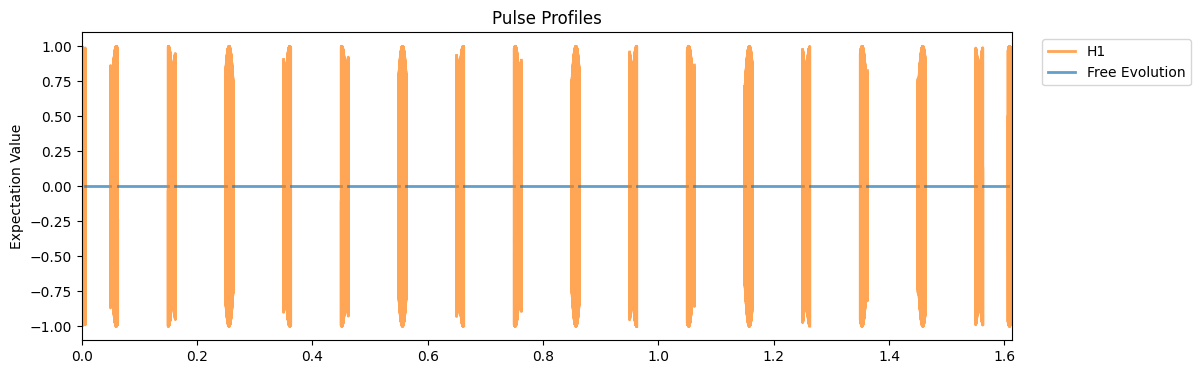

In [3]:
from quaccatoo.QSys import NV

# define the NV center system
qsys = NV(
    N=15, # here we start considering the 15N nuclear spin
    B0 = 39, # external magnetic field in mT
    units_B0='mT',
    theta=3.8, # 3.8 degrees os misalignement
    units_angles='deg'
)

w1 = 40

from quaccatoo.DDPulsedExp import XY8

XY8_15N  = XY8(
    M =2,
    free_duration = np.linspace(.25, .36, 100), # free evolution time in us
    pi_pulse_duration = 1/2/w1, # pi-pulse duration in us
    system = qsys, # NV center system
    H1 = w1*qsys.MW_H1(), # control Hamiltonian
    pulse_params = {'omega_pulse': qsys.MW_freqs()[1]},
    time_steps=200 # MW frequency for the ms=+1 state
)

# plot the pulses
XY8_15N.plot_pulses(tau=.1, figsize=(12, 4))

Here we can observe the 16 pi pulses plus the initial and final pi/2 pulses. Now to run the experiment.

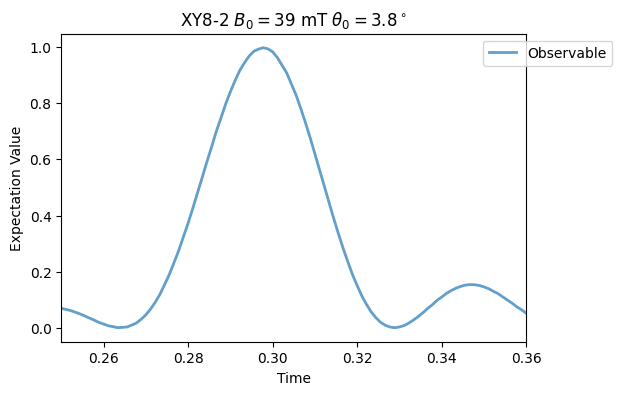

In [4]:
XY8_15N.run()
XY8_15N.plot_results(title=r'XY8-2 $B_0=39$ mT $\theta_0=3.8^\circ$')

Increasing the XY8 order for M=4,6,8:

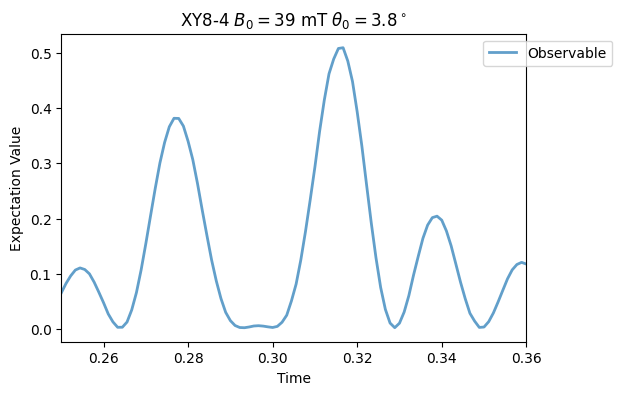

In [5]:
# M = 4
XY8_15N.M = 4
XY8_15N.run()
XY8_15N.plot_results(title=r'XY8-4 $B_0=39$ mT $\theta_0=3.8^\circ$')

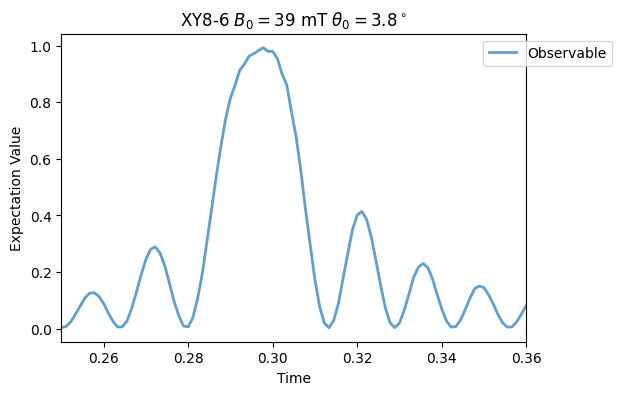

In [6]:
# M = 6
XY8_15N.M = 6
XY8_15N.run()
XY8_15N.plot_results(title=r'XY8-6 $B_0=39$ mT $\theta_0=3.8^\circ$')

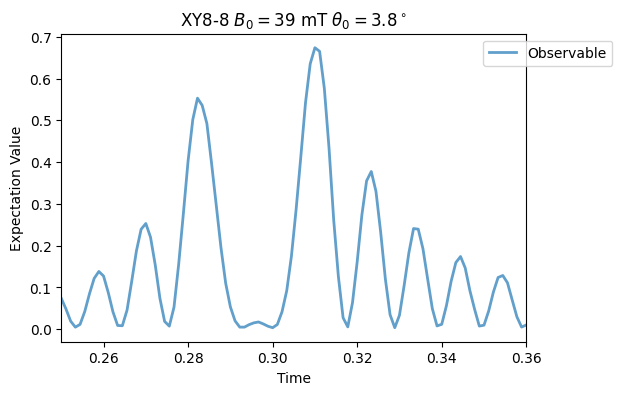

In [7]:
# M = 8
XY8_15N.M = 8
XY8_15N.run()
XY8_15N.plot_results(title=r'XY8-8 $B_0=39$ mT $\theta_0=3.8^\circ$')

Now, changing the field for XY8-2.

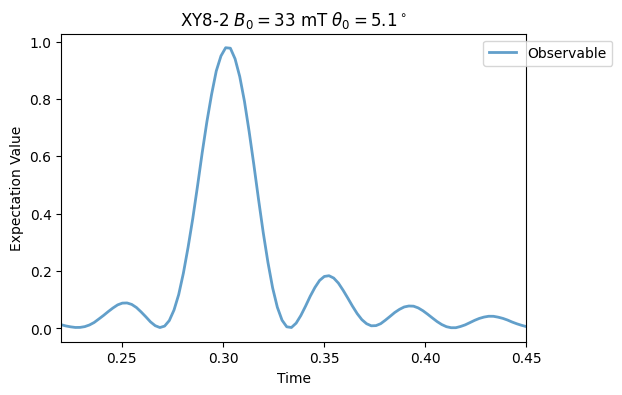

In [8]:
# 33 mT, 5.1 deg
qsys = NV(
    N=15, # here we start considering the 15N nuclear spin
    B0 = 33, # external magnetic field in mT
    units_B0='mT',
    theta=5.1, # 2 degrees os misalignement
    units_angles='deg'
)

XY8_15N  = XY8(
    M =2,
    free_duration = np.linspace(.22, .45, 100), # free evolution time in us
    pi_pulse_duration = 1/2/w1, # pi-pulse duration in us
    system = qsys, # NV center system
    H1 = w1*qsys.MW_H1(), # control Hamiltonian
    pulse_params = {'omega_pulse': qsys.MW_freqs()[1]} # MW frequency for the ms=+1 state
)

XY8_15N.run()
XY8_15N.plot_results(title=r'XY8-2 $B_0=33$ mT $\theta_0=5.1^\circ$')

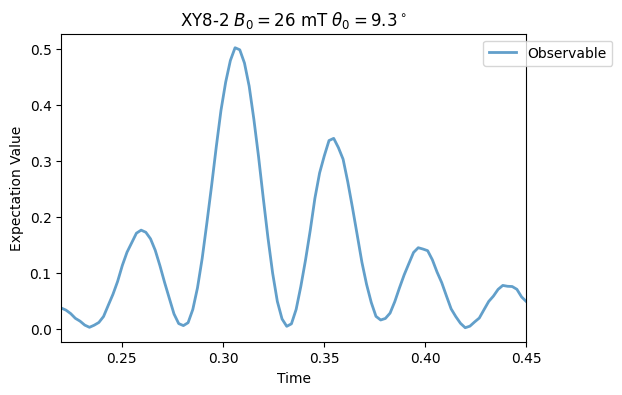

In [9]:
# 26 mT, 9.3 deg
qsys = NV(
    N=15,
    B0 = 26, 
    units_B0='mT',
    theta = 9.3,
    units_angles='deg'
)

XY8_15N  = XY8(
    M =2,
    free_duration = np.linspace(.22, .45, 100), # free evolution time in us
    pi_pulse_duration = 1/2/w1, # pi-pulse duration in us
    system = qsys, # NV center system
    H1 = w1*qsys.MW_H1(), # control Hamiltonian
    pulse_params = {'omega_pulse': qsys.MW_freqs()[1]} # MW frequency for the ms=+1 state
)

XY8_15N.run()
XY8_15N.plot_results(title=r'XY8-2 $B_0=26$ mT $\theta_0=9.3^\circ$')

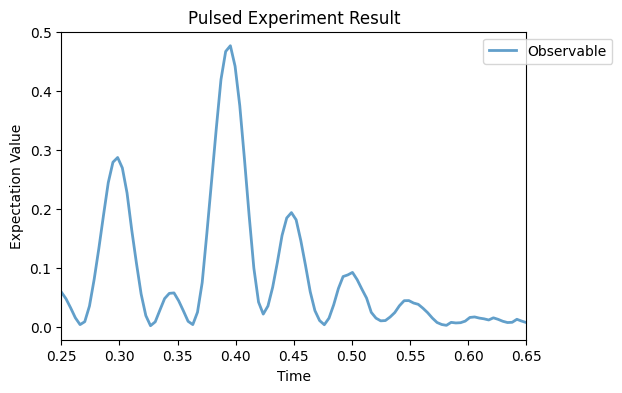

In [10]:
# 17 mT, 17 deg
qsys = NV(
    N=15, # here we start considering the 15N nuclear spin
    B0 = 17, # external magnetic field in mT
    units_B0='mT',
    theta=17, # 2 degrees os misalignement
    units_angles='deg'
)

XY8_15N  = XY8(
    M =2,
    free_duration = np.linspace(.25, .65, 100), # free evolution time in us
    pi_pulse_duration = 1/2/w1, # pi-pulse duration in us
    system = qsys, # NV center system
    H1 = w1*qsys.MW_H1(), # control Hamiltonian
    pulse_params = {'omega_pulse': qsys.MW_freqs()[0]} # MW frequency for the ms=-1 state
)

XY8_15N.run()
XY8_15N.plot_results()